# Task description:
- Load the wine quality data set as shown in previous lectures. Create a neuronal network which from the the taste quality from the chemical wine properties. 
- How long does it take to train the network?
- What factors play a role in the training time?
- How would you graphically represent this data set? Show examples.

# Implementation:

In [17]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
from collections import OrderedDict
import time
import seaborn as sns
import pandas as pd

Task: Load the wine quality data set as shown in previous lectures. Create a neuronal network which tells the taste quality from the chemical wine properties.

In [2]:
# load the data, skip the first header row
wine_np = np.loadtxt("winequality-white.csv", dtype=np.float32, delimiter=";", skiprows=1)
wine_t = torch.tensor(wine_np, dtype=torch.float)

# devide the data in the target value and the feature values
wine_quality = wine_t[:, -1]
wine_features = wine_t[:, :-1]

# print(wine_quality)
# print(wine_features)
# print(wine_features.shape)

In [3]:
# devide the dataset into test and validation datasets
n_samples = wine_features.shape[0]
n_val = int(0.2 * n_samples) # 20% of testdata is validationdata

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

# print("train_indices:", train_indices, "val_indices:", val_indices)

wine_features_train = wine_features[train_indices]
wine_quality_train = wine_quality[train_indices].unsqueeze(1)

wine_features_val = wine_features[val_indices]
wine_quality_val = wine_quality[val_indices].unsqueeze(1)

wine_features_train_norm = 0.1 * wine_features_train
wine_features_val_norm = 0.1 * wine_features_val

# print("wine_features_train:", wine_features_train)

In [4]:
def training_loop(n_epochs, optimizer, model, loss_fn, wine_features_train, wine_features_val,
                  wine_quality_train, wine_quality_val):
    for epoch in range(1, n_epochs + 1):
        wine_train = model(wine_features_train) # <1>
        loss_train = loss_fn(wine_train, wine_quality_train)

        wine_val = model(wine_features_val) # <1>
        loss_val = loss_fn(wine_val, wine_quality_val)
        
        optimizer.zero_grad()
        loss_train.backward() # <2>
        optimizer.step()

        if epoch <= 3 or epoch == 1000 or epoch % 5000 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():.4f}")

In [5]:
# define sequential model and optimizer
seq_model = nn.Sequential(OrderedDict(
    [('hidden_linear', nn.Linear(11, 50)),
     ('hidden_activation', nn.Tanh()),
     ('output_linear', nn.Linear(50, 1))]))

optimizer = optim.SGD(seq_model.parameters(), lr=1e-3)

In [6]:
time_start = time.time()
training_loop(
    n_epochs = 30000, 
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    wine_features_train = wine_features_train_norm,
    wine_features_val = wine_features_val_norm, 
    wine_quality_train = wine_quality_train,
    wine_quality_val = wine_quality_val)
time_end = time.time()


Epoch 1, Training loss 32.8412, Validation loss 32.2731
Epoch 2, Training loss 27.3739, Validation loss 26.8258
Epoch 3, Training loss 22.8346, Validation loss 22.3089
Epoch 1000, Training loss 0.7739, Validation loss 0.7106
Epoch 5000, Training loss 0.6900, Validation loss 0.6530
Epoch 10000, Training loss 0.6572, Validation loss 0.6237
Epoch 15000, Training loss 0.6294, Validation loss 0.6010
Epoch 20000, Training loss 0.6086, Validation loss 0.5873
Epoch 25000, Training loss 0.5946, Validation loss 0.5778
Epoch 30000, Training loss 0.5838, Validation loss 0.5712


Task: How long does it take to train the network?

In [7]:
time_duration = time_end - time_start
print(f'It took {int(time_duration/60)}m and {int(time_duration%60)}s to train the network')

It took 0m and 54s to train the network


Task: What factors play a role in the training time? <br>
<br>
Answer: The training time of a neural network can be influenced by several factors, including:

- Network architecture: The size and complexity of the network architecture, such as the number of layers and neurons, can impact training time. Larger and deeper networks often require more time to train due to increased computational requirements.

- Dataset size: The size of the training dataset can affect training time. Larger datasets may require more time to process and train the network on a sufficient amount of data.

- Computational resources: The computational resources available, such as CPU or GPU power, can significantly impact training time. GPUs are generally faster than CPUs for training deep neural networks due to their parallel processing capabilities.

- Optimization algorithm: The choice of optimization algorithm, such as stochastic gradient descent (SGD) or adaptive methods like Adam, can affect training time. Different algorithms have different convergence speeds and efficiency.

- Hyperparameter tuning: The process of finding optimal hyperparameters, such as learning rate and regularization strength, can require additional time. Hyperparameter tuning often involves training multiple models to find the best combination of hyperparameters.

- Early stopping and convergence: Training time can be influenced by the convergence behavior of the network. Early stopping techniques can help stop training when the model's performance on a validation set stops improving, potentially reducing training time.

It's important to consider these factors and strike a balance between training time and achieving satisfactory performance on the task at hand.

Task: How would you graphically represent this data set? Show examples.

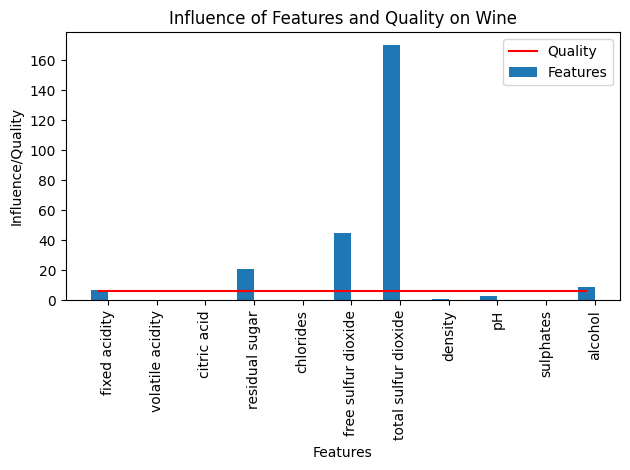

In [18]:
# Create an array of feature names
wine_feature_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
                 'density', 'pH', 'sulphates', 'alcohol']

# create numpy array of example row in given data
example = 0
wine_features_np = wine_features[example].numpy()
wine_quality_np = [wine_quality[example].numpy()]*len(wine_features_np)


# Create an array of indices for the x-axis
indices = np.arange(len(wine_feature_names))

# Set the width of the bars
bar_width = 0.35

# Plot the feature influences
plt.bar(indices, wine_features_np, bar_width, label='Features')
plt.plot(indices, wine_quality_np, 'r-', label='Quality')
# plt.bar(indices + bar_width, wine_quality_np, bar_width, label='Quality')

# Customize the plot
plt.xlabel('Features')
plt.ylabel('Influence/Quality')
plt.title('Influence of Features and Quality on Wine')
plt.xticks(indices + bar_width / 2, wine_feature_names, rotation='vertical')
plt.legend()

plt.tight_layout()
plt.show()

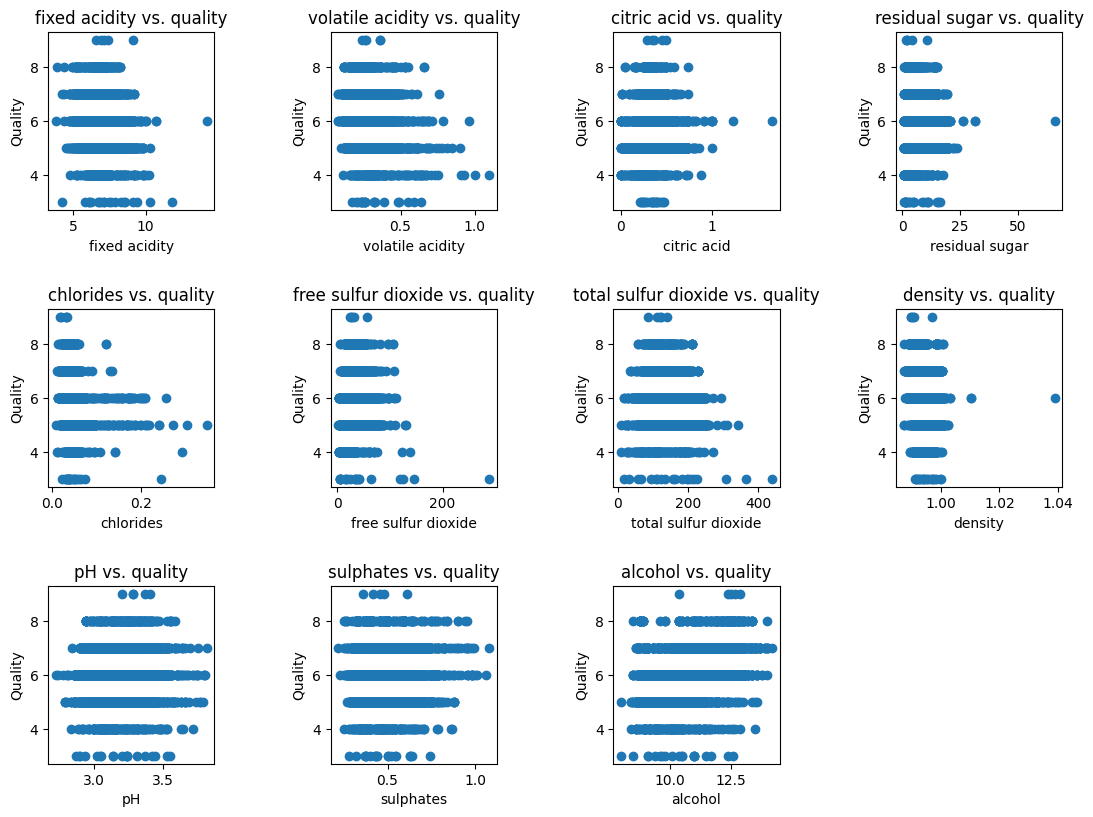

In [19]:
# Create figure and subplots
fig, axs = plt.subplots(3, 4, figsize=(12, 9))
fig.tight_layout(pad=5.0)  # Add spacing between subplots

# Iterate over each feature and plot it against quality
for i, ax in enumerate(axs.flatten()):
    if i < len(wine_features[0]):
        ax.scatter(wine_features[:, i], wine_quality)
        ax.set_xlabel(wine_feature_names[i])
        ax.set_ylabel('Quality')
        ax.set_title(wine_feature_names[i] + ' vs. quality')

# Hide unused subplots if there are less than 12 features
if len(wine_features[0]) < 12:
    for i in range(len(wine_features[0]), 12):
        axs.flatten()[i].axis('off')

plt.show()

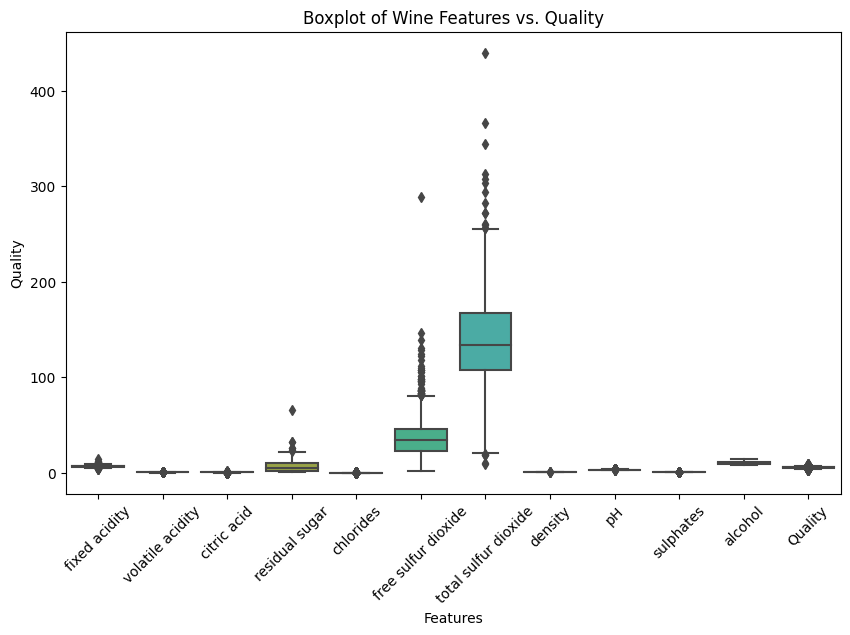

In [20]:
df = pd.DataFrame(wine_features, columns=[wine_feature_names[i] for i in range(11)])
df['Quality'] = wine_quality.flatten()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Quality')
plt.title('Boxplot of Wine Features vs. Quality')

plt.show()

<Figure size 1000x1000 with 0 Axes>

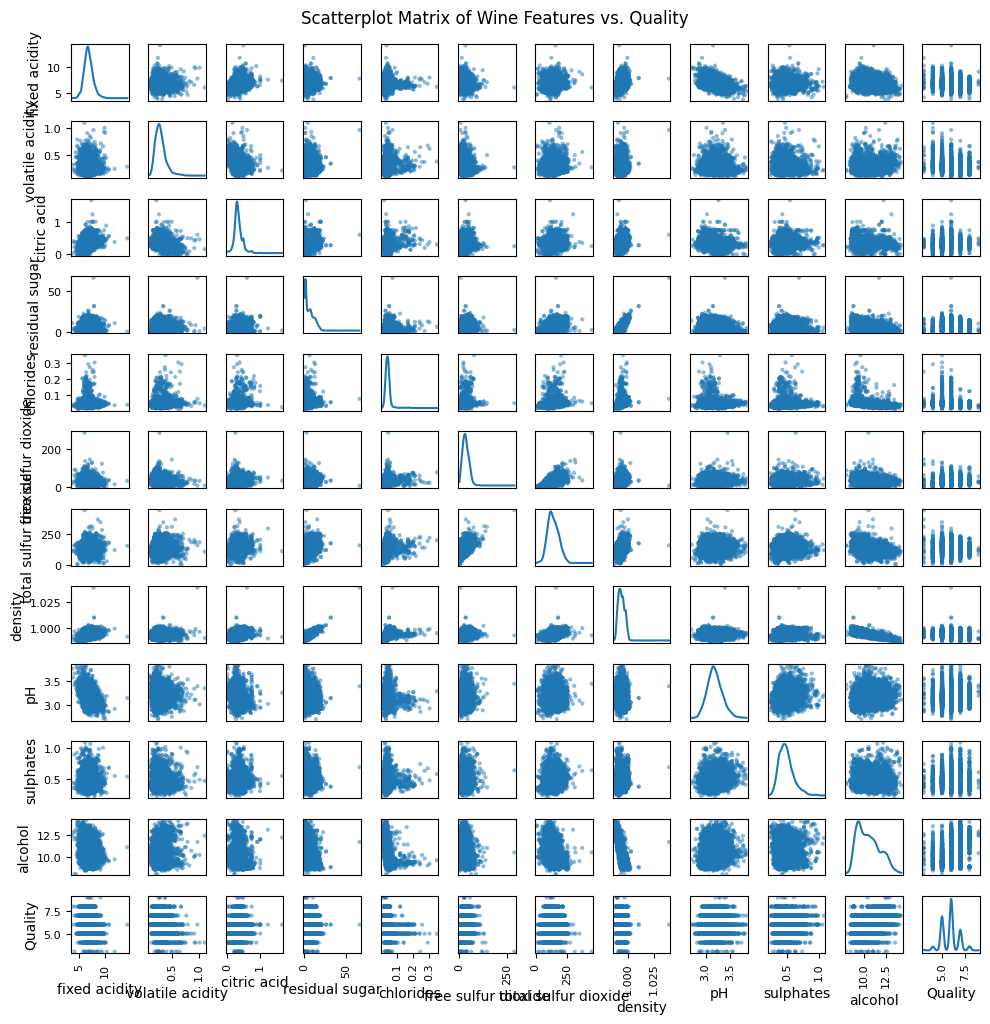

In [21]:
plt.figure(figsize=(10, 10))
pd.plotting.scatter_matrix(df, figsize=(10, 10), diagonal='kde')
plt.tight_layout()
plt.suptitle('Scatterplot Matrix of Wine Features vs. Quality', y=1.02)

plt.show()

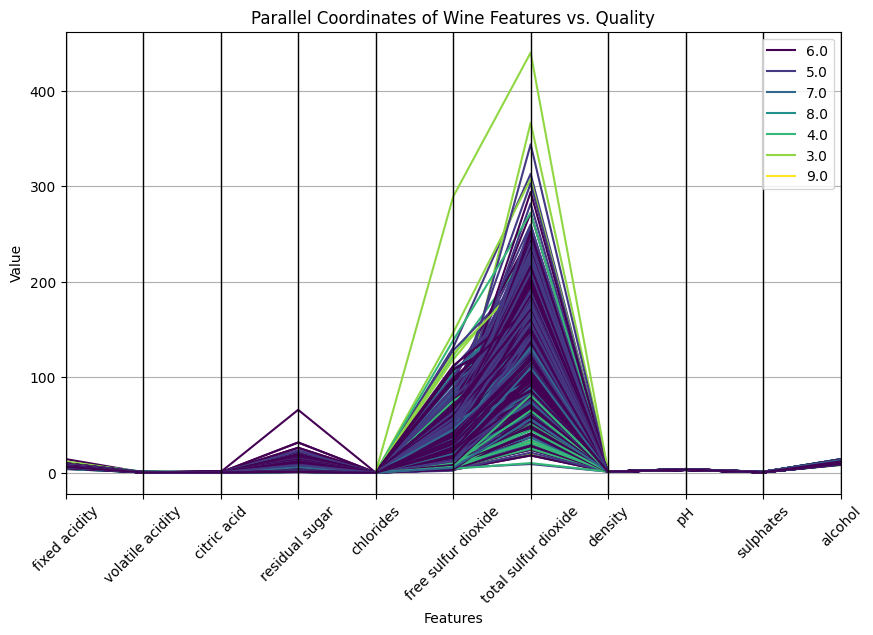

In [22]:
plt.figure(figsize=(10, 6))
pd.plotting.parallel_coordinates(df, 'Quality', colormap='viridis')
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Value')
plt.title('Parallel Coordinates of Wine Features vs. Quality')

plt.show()